#### The look alike innovation to Mercedes EQS is Tesla model S for the following reasons:
1) "In October 2014, Tesla Motors announced its first version of Autopilot. Model S cars equipped with this system are capable of lane control with autonomous steering, braking, and speed limit adjustment based on signal image recognition."(https://en.wikipedia.org/wiki/History_of_self-driving_cars#:~:text=In%20October%202014%2C%20Tesla%20Motors,based%20on%20signal%20image%20recognition.)
2) Tesla model S is also a S class sedan like the Mercedes EQS. Also, both of them have electric engines.

#### Importing required libraries

In [270]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#### Data Cleaning and Manupulation

In [271]:
df = pd.read_excel(
    'statistic_id976917_total-sales-of-tesla-model-s-cars-in-the-netherlands-2013-2022.xlsx', 
    'Data'
    )
df.rename(columns= {'Unnamed: 1':'Year', 'Unnamed: 2': 'UnitsSold'}, inplace = True)
df.drop(columns = 'Unnamed: 0', inplace=True)

In [272]:
df

,Year,UnitsSold
0,NaN,NaN
1,Total sales of Tesla Model S cars in the Nethe...,NaN
2,Total sales of Tesla Model S cars in the Nethe...,NaN
3,NaN,NaN
4,2013,1194.0
5,2014,1437.0
6,2015,1891.0
7,2016,1723.0
8,2017,2077.0
9,2018,5622.0


In [273]:
df.drop(index= range(0,4), inplace = True)
df.reset_index(drop = True, inplace = True)
df['CumSum'] = np.cumsum(df['UnitsSold'])
df['YearCount'] = range(1,11)
df['Year'] = df['Year'].astype(int)

In [274]:
df

,Year,UnitsSold,CumSum,YearCount
0,2013,1194.0,1194.0,1
1,2014,1437.0,2631.0,2
2,2015,1891.0,4522.0,3
3,2016,1723.0,6245.0,4
4,2017,2077.0,8322.0,5
5,2018,5622.0,13944.0,6
6,2019,527.0,14471.0,7
7,2020,292.0,14763.0,8
8,2021,5.0,14768.0,9
9,2022,80.0,14848.0,10


#### Bass model parameter estimation

In [275]:
def bass_model(t, m, p, q):
    adoption = m * (1 - np.exp(-(p + q) * t)) / (1 + q / p * np.exp(-(p + q) * t))
    return adoption

initial_guess = [max(df["CumSum"]), 0.04, 0.4]  

params, covariance = curve_fit(
    bass_model, 
    df["YearCount"], 
    df["CumSum"], 
    p0=initial_guess, 
    maxfev=10000
    )

m_est, p_est, q_est = params
print(f"M: {m_est}\np: {p_est}\nq: {q_est}")

M: 15533.535974255308
p: 0.02944044641942106
q: 0.7395113403711501


#### Defining bass model range of prediction

In [276]:
t_future = np.array(range(1, 14)) 
cumulative_adoption_predictions = bass_model(t_future, m_est, p_est, q_est)

#### Visualization of actual and predicted adoptions until 2025

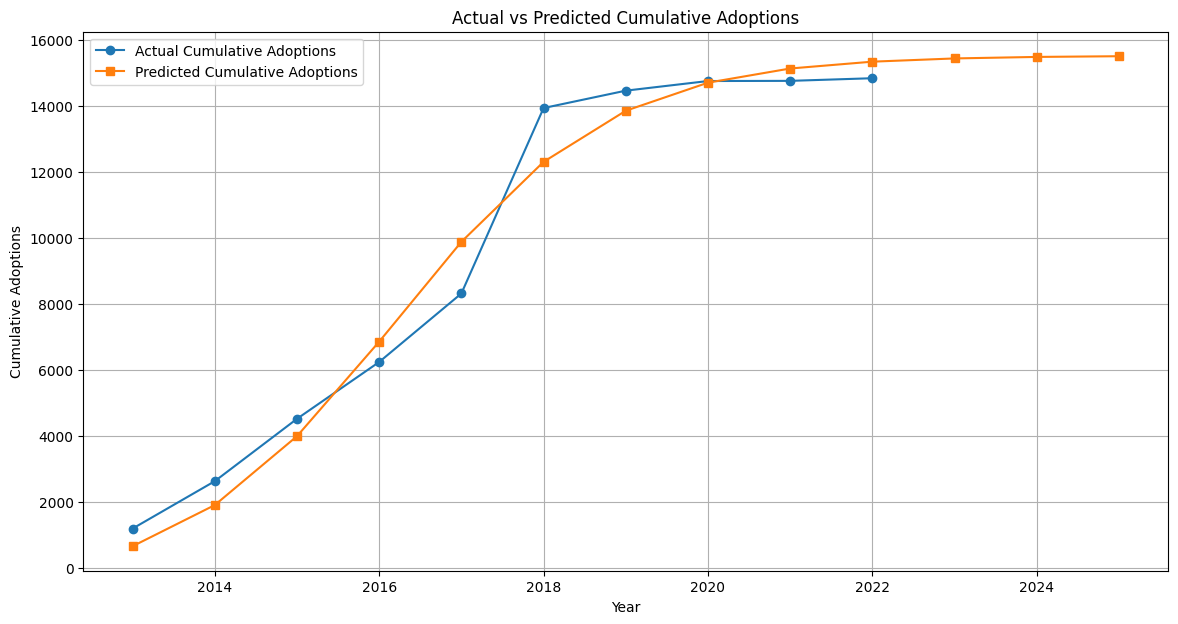

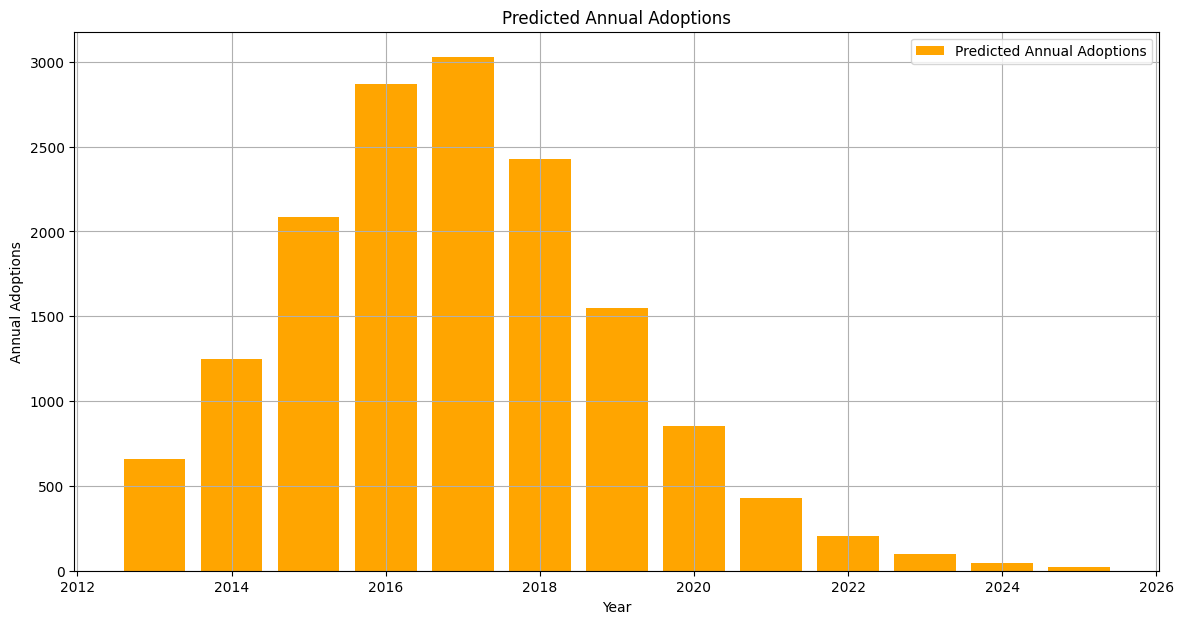

In [277]:
annual_adoption_predictions = np.diff(cumulative_adoption_predictions, prepend=0)

plt.figure(figsize=(14, 7))

plt.plot(df["Year"], df["CumSum"], 'o-', label='Actual Cumulative Adoptions')

plt.plot(
    df["Year"][0] + t_future - 1, 
    cumulative_adoption_predictions, 
    's-', label='Predicted Cumulative Adoptions'
         )

plt.title('Actual vs Predicted Cumulative Adoptions')
plt.xlabel('Year')
plt.ylabel('Cumulative Adoptions')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))

plt.bar(
    df["Year"][0] + t_future - 1, 
    annual_adoption_predictions, 
    color='orange', 
    label='Predicted Annual Adoptions'
        )


plt.title('Predicted Annual Adoptions')
plt.xlabel('Year')
plt.ylabel('Annual Adoptions')
plt.legend()
plt.grid(True)
plt.show()